In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from lifelines.datasets import load_waltons
from lifelines import KaplanMeierFitter

pd.set_option('mode.chained_assignment', None)

def pl(obs,s,e,d):
    """Plot a line for each observation.
    
    obs: DataFrame
    """
    for y, row in obs.iterrows():
        start = row[s]
        end = row[e]
        status = row[d]
        
        if status == 0:
            # live
            plt.hlines(y, start, end, color='C0')
        else:
            # dead
            plt.hlines(y, start, end, color='C1')
            plt.plot(end, y, marker='o', color='C1')
            
    plt.xlabel('Time')
    plt.ylabel('Index')
    plt.gca().invert_yaxis()

In [4]:
df=pd.read_csv('processed/participants.csv')

<AxesSubplot:>

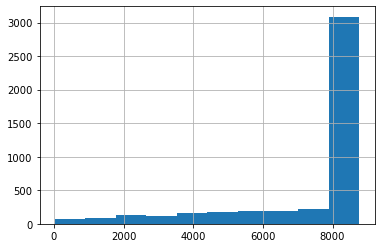

In [5]:
df.TIMEDTH.hist()

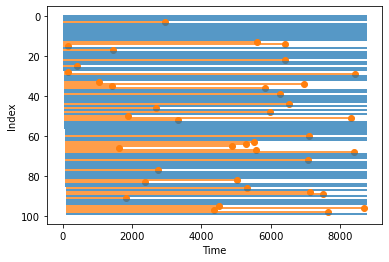

In [9]:
pl(df.head(100).reset_index(),0,'TIMEDTH','DEATH')

<AxesSubplot:>

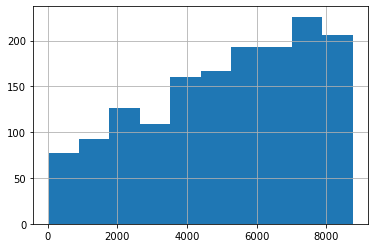

In [10]:
dead=df[df['DEATH']>0]
dead.TIMEDTH.hist()

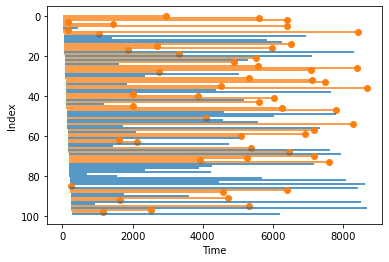

In [12]:
dead['SEX_b']=df.SEX-1
pl(dead.head(100).reset_index(),0,'TIMEDTH','SEX_b')

<AxesSubplot:xlabel='timeline'>

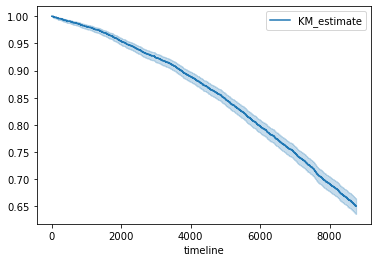

In [13]:
T = df['TIMEDTH']
E = df['DEATH']
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)  # or, more succinctly, kmf.fit(T, E)
kmf.survival_function_
kmf.cumulative_density_
kmf.plot_survival_function()

Text(0, 0.5, 'Survival ratio')

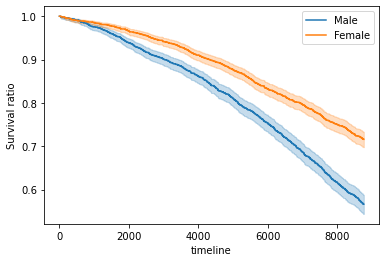

In [14]:
groups = df['SEX']
ix = (groups == 2)

kmf.fit(T[~ix], E[~ix], label='Male')
ax = kmf.plot_survival_function()

kmf.fit(T[ix], E[ix], label='Female')
ax = kmf.plot_survival_function(ax=ax)
ax.set_ylabel('Survival ratio')